In [3]:
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
df = pd.read_csv('../data/takehome_data_algo.csv')

In [3]:
df.head()

,id_search,label,id_user,id_listing,ds_search,ds_book,ds_contact,query_market,query_checkin,query_checkout,...,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
0,1d320d4d-4826-42b6-9ebe-97d8f2adc543,impression,e566365a0638690cc6572c40e99729ac,6f6d6ba9c29e63a1fdb85742a598b5b5,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.787234,14.0,0.735546,1,0,52.752133,0.902703,1.001322,1.0,1125.0
1,94f40f5e-5d7c-4593-b745-220c8db1070d,impression,e566365a0638690cc6572c40e99729ac,15eaa0a653431dfb2c80e3e031866e49,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,NaN,0.625522,0,0,54.973157,1.000613,1.000300,2.0,30.0
2,e9649afc-d30a-4b77-bb0a-8cfd5c3423ea,impression,e566365a0638690cc6572c40e99729ac,69a48538dedb0975b59feaa6ba38567a,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.873563,12.0,NaN,1,1,39.465325,0.851500,0.920734,1.0,1120.0
3,75c98fbc-84e9-4dde-b882-87f9985d1942,impression,e566365a0638690cc6572c40e99729ac,79b9a8296d922ad4ebbd44c511049b90,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,4.714286,5.0,0.073634,1,1,39.827413,0.643434,0.951680,4.0,6.0
4,11886a08-c9da-4b41-98cd-8d4109a35779,impression,e566365a0638690cc6572c40e99729ac,cc68e4db29988e237131d93e022d7316,11/26/18,NaN,NaN,City A,4/24/19,4/29/19,...,5.000000,0.0,0.005806,0,0,47.557220,NaN,NaN,3.0,1125.0


In [4]:
df.describe()

,query_num_guests,query_num_children,query_num_infants,query_radius,query_price_max,query_price_min,query_center_lat,query_center_lng,listing_is_new,listing_total_price,...,listing_accuracy_rating,listing_num_books_90day,listing_occupancy_rate,listing_monthly_discount,listing_weekly_discount,listing_cleaning_fee,listing_monthly_price_factor,listing_weekly_price_factor,listing_minimum_nights,listing_maximum_nights
count,177588.000000,177588.000000,177588.000000,177588.000000,1.775880e+05,177588.000000,177588.000000,177588.000000,177588.000000,168567.000000,...,177588.000000,152788.000000,166711.000000,177588.000000,177588.000000,132536.000000,130958.000000,132710.000000,177384.000000,1.773840e+05
mean,2.534952,0.145201,0.045842,15.698297,1.284573e+07,4.711563,-23.090200,-44.066025,0.193752,714.201331,...,3.278672,5.570064,0.292050,0.583609,0.571643,34.078579,0.810746,0.916513,2.322639,6.389164e+04
std,1.851452,0.484518,0.217718,97.096165,1.165330e+08,37.856419,0.839811,1.647179,0.395238,2452.346764,...,2.579727,7.451212,0.310519,0.492961,0.494842,28.675865,0.153240,0.074972,2.732783,8.564242e+06
min,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,-35.440000,-75.900000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003478,0.129925,0.000000,1.000000e+00
25%,1.000000,0.000000,0.000000,0.902826,-1.000000e+00,-1.000000,-23.130000,-45.110000,0.000000,137.366592,...,-1.000000,0.000000,0.001780,0.000000,0.000000,18.588783,0.700532,0.889399,1.000000,6.000000e+01
50%,2.000000,0.000000,0.000000,2.440112,-1.000000e+00,-1.000000,-22.980000,-43.200000,0.000000,307.891692,...,4.829787,2.000000,0.181464,1.000000,1.000000,32.656441,0.811437,0.919605,2.000000,1.125000e+03
75%,3.000000,0.000000,0.000000,12.978922,5.100000e+01,0.000000,-22.950000,-43.180000,0.000000,700.059634,...,5.000000,9.000000,0.557424,1.000000,1.000000,41.984102,0.941215,0.979881,3.000000,1.125000e+03
max,17.000000,6.000000,3.000000,5524.709668,1.070000e+09,2758.000000,40.720000,20.440000,1.000000,525996.146115,...,5.000000,64.000000,1.009722,1.000000,1.000000,799.821000,1.006567,1.003213,180.000000,2.000000e+09


In [7]:
df.isna().sum()

id_search                               0
label                                   0
id_user                                 0
id_listing                              0
ds_search                               0
ds_book                            175348
ds_contact                         172315
query_market                            0
query_checkin                           0
query_checkout                          0
query_num_guests                        0
query_num_children                      0
query_num_infants                       0
query_radius                            0
query_price_max                         0
query_price_min                         0
query_center_lat                        0
query_center_lng                        0
listing_is_new                          0
listing_total_price                  9021
listing_instant_bookable                0
listing_lat                             0
listing_lng                             0
listing_review_rating             

In [5]:
!pip install missingno

In [6]:
import missingno

<AxesSubplot:>

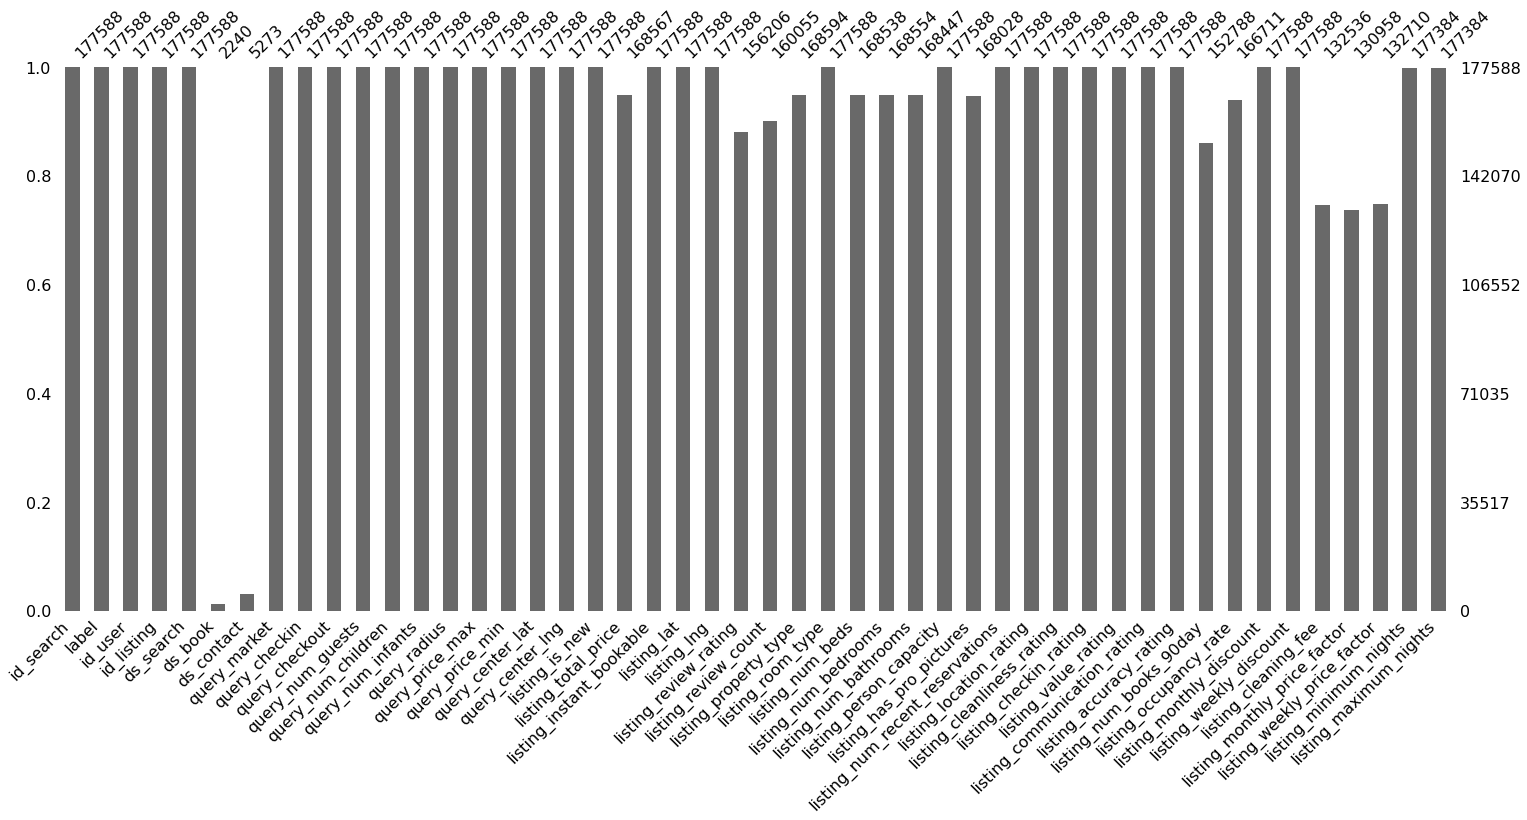

In [8]:
missingno.bar(df) #shows proportion of missing data to observations. The smaller the bar, the more observations are missing

Columns with a significant number of missing values >50% are as followed: 

<AxesSubplot:>

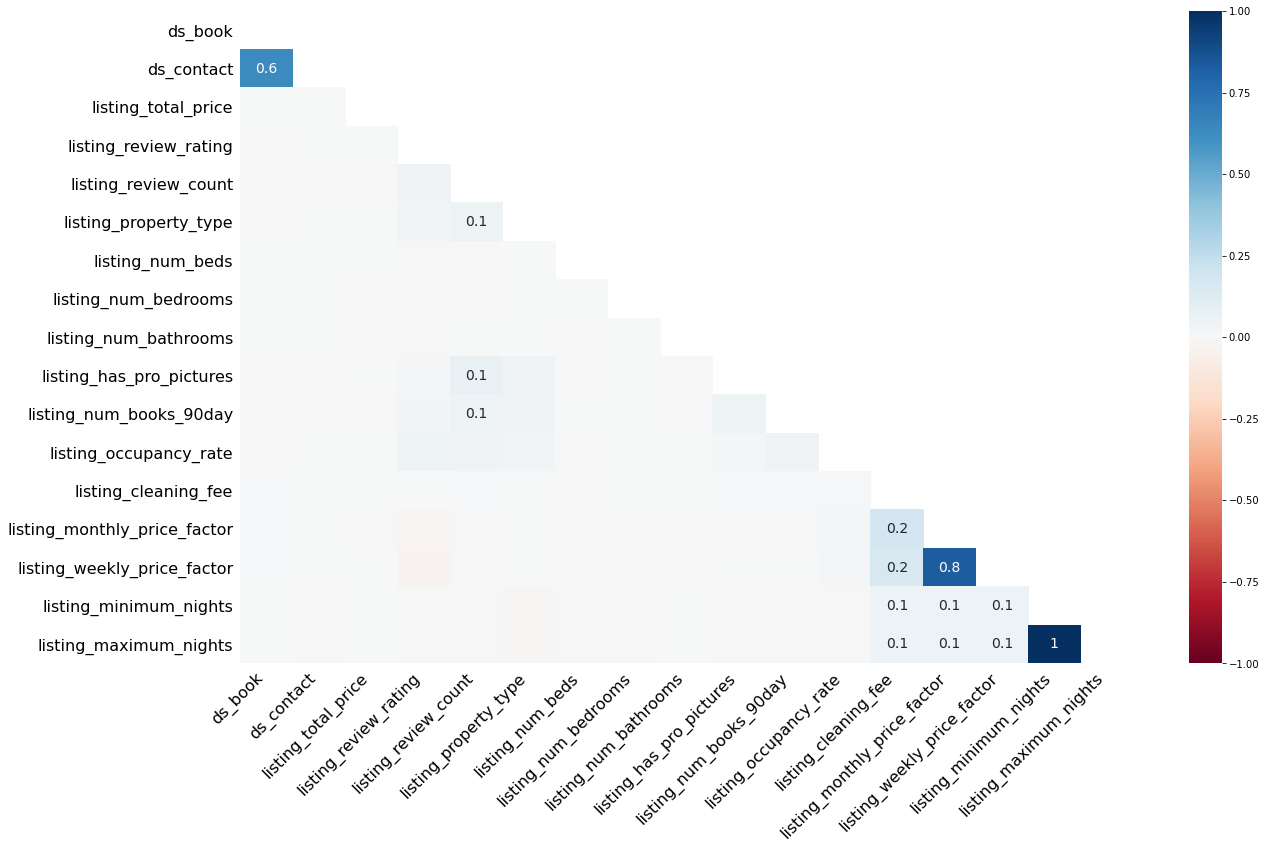

In [9]:
missingno.heatmap(df) #demonstrates correlation of missingness between features

In [11]:
df['ds_book'].unique() #days available are only between the 23rd of November and the 3rd of December

array([nan, '11/23/18', '11/25/18', '11/26/18', '11/21/18', '11/27/18',
       '11/22/18', '11/20/18', '11/29/18', '12/2/18', '11/30/18',
       '12/3/18', '11/28/18', '11/24/18', '12/1/18'], dtype=object)

In [12]:
df['ds_contact'].unique() #dates are between the 20th of November and the 3rd of December

array([nan, '11/23/18', '11/29/18', '11/25/18', '11/26/18', '11/20/18',
       '11/21/18', '11/28/18', '11/27/18', '11/22/18', '11/30/18',
       '11/24/18', '12/2/18', '12/3/18', '12/1/18'], dtype=object)

In [14]:
df.dtypes

id_search                           object
label                               object
id_user                             object
id_listing                          object
ds_search                           object
ds_book                             object
ds_contact                          object
query_market                        object
query_checkin                       object
query_checkout                      object
query_num_guests                     int64
query_num_children                   int64
query_num_infants                    int64
query_radius                       float64
query_price_max                    float64
query_price_min                      int64
query_center_lat                   float64
query_center_lng                   float64
listing_is_new                       int64
listing_total_price                float64
listing_instant_bookable              bool
listing_lat                        float64
listing_lng                        float64
listing_rev

In [21]:
for col in df:
    print(df[col].nunique())

60815
4
2999
30960
6
14
14
2
220
252
18
7
4
159886
609
266
355
592
2
167251
2
550
819
1858
266
46
3
39
20
36
19
2
4
1734
2093
1431
1942
1488
1652
62
137643
2
2
126070
130958
132710
41
240


In [22]:
for col in df:
    print(df[col].value_counts())

4f2f0406-0e05-416e-86b9-6730fe5ac64f    18
fa151f9a-d751-4660-8c95-c93903fb6a80    18
4c398ee0-ba40-413f-94b0-03b348518266    18
2aee1ee4-52a7-484f-9c13-4d44fd92ade8    18
42d6c408-326f-43ab-bc50-32936dd0f27c    18
                                        ..
14ef209d-656a-4d7d-8de6-18c502e5ff94     1
1210c021-952b-464e-9768-14fe4a182bc7     1
a46946bb-7a30-4988-b951-39a8415fb4ea     1
17da60ec-c231-4c2a-9c7c-bb7fadb2f725     1
68d4ab82-623c-492b-9b7f-d9c32b6568c1     1
Name: id_search, Length: 60815, dtype: int64
impression      130031
click            42251
host_contact      3066
book              2240
Name: label, dtype: int64
911b32e5d6cd2b59e7777c7f5a8111f5    627
fcc70ed17acd38ff12c2d971ee4ceba3    512
9ca0b8d92762d2000782feb217b13a16    456
582197984a2e63379004a1157b2b211a    448
c8f4ca9f2a9667cc974d8ac7f5745d8c    398
                                   ... 
f803ae38abdd75e2cac13970be9e79ef      1
fc7d307067f0eeed9fb6da8c06cfc400      1
47f9b2f884e7ab0c5b79008435ada9a2      1
3f4a

In [26]:
prcnt_bookings =  2240 / 177588
prcnt_impressions = 130031 / 177588
prcnt_contact_book = 2240/3066
prcnt_click_book = 2240/42251

In [27]:
prcnt_bookings

0.012613464873752731

In [28]:
prcnt_impressions

0.7322060049102417

In [29]:
prcnt_contact_book

0.730593607305936

In [30]:
prcnt_click_book

0.05301649665096684

In [58]:
import seaborn as sns

In [65]:
def correlation(df):
    corr_matrix = df.corr(method = 'pearson')
    sns.heatmap(corr_matrix)
    plt.show()

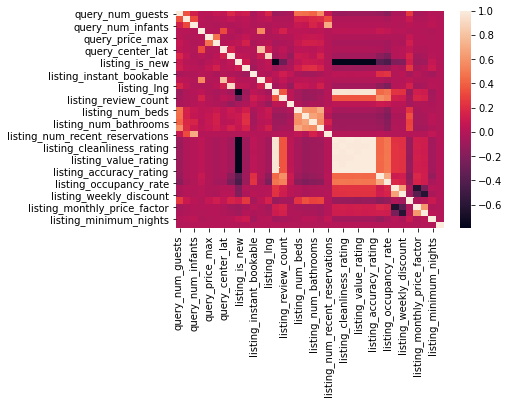

In [66]:
correlation(df = df)

List of interesting findings:
    73% of searches lead to an impression, 
    12% of searches lead to a booking
    73% of people that contact the host book
    5% of people that click book

Will be using Random Forest Classification model as a baseline.
Why? Because this is a multiclass classification model and random forest algorithm is quite performant on these problems
and the features are a mixture of numerical, categorical, continuous, and ordinal variables. 